<a href="https://colab.research.google.com/github/taufixhdyt/Machine-Learning-Fundamentals/blob/main/Praktikum2_G.211.21.0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df[cat_col].nunique()[:50]

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Drop Name and Ticket columns

In [ ]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

Handling missing data:

In [ ]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [ ]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Handling outliers:

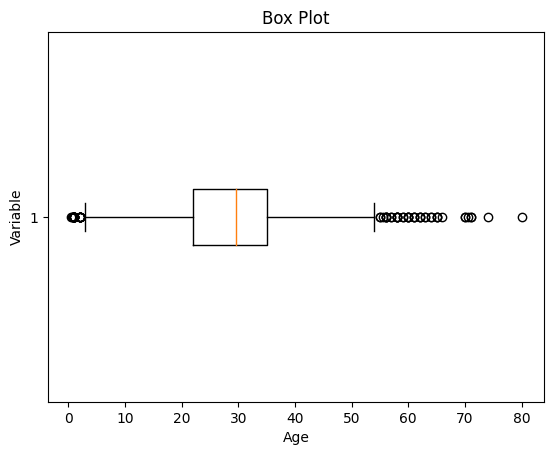

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound:',upper_bound)

df4 = df3[(df3['Age'] >= lower_bound)
& (df3['Age'] <= upper_bound)]

Lower Bound : 3.7054001079256587
Upper Bound: 55.57878528533277


Data transformation

In [ ]:
X = df3[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

num_col_ = [col for col in X.columns if X [col].dtype != 'object']
x1 = X

x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-24-209de419448c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


Handling Imbalanced Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files
uploaded= files.upload()

In [ ]:
data = pd.read_csv('creditcard.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    999 non-null    int64  
 1   V1      999 non-null    float64
 2   V2      999 non-null    float64
 3   V3      999 non-null    float64
 4   V4      999 non-null    float64
 5   V5      999 non-null    float64
 6   V6      999 non-null    float64
 7   V7      999 non-null    float64
 8   V8      999 non-null    float64
 9   V9      999 non-null    float64
 10  V10     999 non-null    float64
 11  V11     999 non-null    float64
 12  V12     999 non-null    float64
 13  V13     999 non-null    float64
 14  V14     999 non-null    float64
 15  V15     999 non-null    float64
 16  V16     999 non-null    float64
 17  V17     999 non-null    float64
 18  V18     999 non-null    float64
 19  V19     999 non-null    float64
 20  V20     999 non-null    float64
 21  V21     999 non-null    float64
 22  V2

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data ['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis = 1)
data['Class'].value_counts()

0    997
1      2
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number of transactions in X_train dataset: ", X_train.shape[0])
print("Number of transactions in y_train dataset: ", y_train.shape[0])
print("Number of transactions in X_test dataset: ", X_test.shape[0])
print("Number of transactions in y_test dataset: ", y_test.shape[0])

Number of transactions in X_train dataset:  699
Number of transactions in y_train dataset:  699
Number of transactions in X_test dataset:  300
Number of transactions in y_test dataset:  300


In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train.ravel())

prediction = lr.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Using SMOTE Algorithm

In [ ]:
print("Before OverSampling, counts of label '1' : {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0' : {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1' : 2
Before OverSampling, counts of label '0' : 697 

After OverSampling, the shape of train_X: (1394, 29)
After OverSampling, the shape of train_y: (1394,) 

After OverSampling, counts of label '1': 697
After OverSampling, counts of label '0': 697


In [ ]:
lr  = LogisticRegression()
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Using SMOTE Algorithm

In [ ]:
print("Before OverSampling, counts of label '1' : {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0' : {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=1)  # Set k_neighbors to 1 or 2
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1' : 2
Before OverSampling, counts of label '0' : 697 

After OverSampling, the shape of train_X: (1394, 29)
After OverSampling, the shape of train_y: (1394,) 

After OverSampling, counts of label '1': 697
After OverSampling, counts of label '0': 697


In [ ]:
lr1  = LogisticRegression()
lr1.fit(X_train, y_train.ravel())

predictions = lr1.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



NearMiss Algorithm

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1 )))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0 )))

from imblearn.under_sampling import NearMiss

nr = NearMiss(sampling_strategy='auto', version=1, n_neighbors=1)

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, counts of label '1': 2
Before Undersampling, counts of label '0': 697 

After Undersampling, the shape of train_X: (4, 29)
After Undersampling, the shape of train_y: (4,) 

After Undersampling, counts of label '1': 2
After Undersampling, counts of label '0': 2


In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

